In [1]:
import numpy as np
import librosa
from hmmlearn import hmm
 
# Load the audio file
file_path = "sentence.wav"  # Assuming the file is in the same directory as your notebook
signal, sr = librosa.load(file_path, sr=None)
 
# Extract STFT features
stft = np.abs(librosa.stft(signal))
 
# Convert STFT features to observation sequence
obs_seq = np.transpose(stft)
 
# Train an HMM model
num_states = 3  # Number of states in the HMM
num_mix = 1     # Number of mixtures in each state
model = hmm.GaussianHMM(n_components=num_states, covariance_type="full", n_iter=1000)
model.fit(obs_seq)
 
# Classify using trained HMM model
predicted_labels = model.predict(obs_seq)
 
# Output the predicted labels
print("Predicted labels:", predicted_labels)

Fitting a model with 1580558 free scalar parameters with only 236775 data points will result in a degenerate solution.


Predicted labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 1 0 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 0 0 0 0 0 0 1 0 0 1 0 1
 0 1 0 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1
 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 1 0]


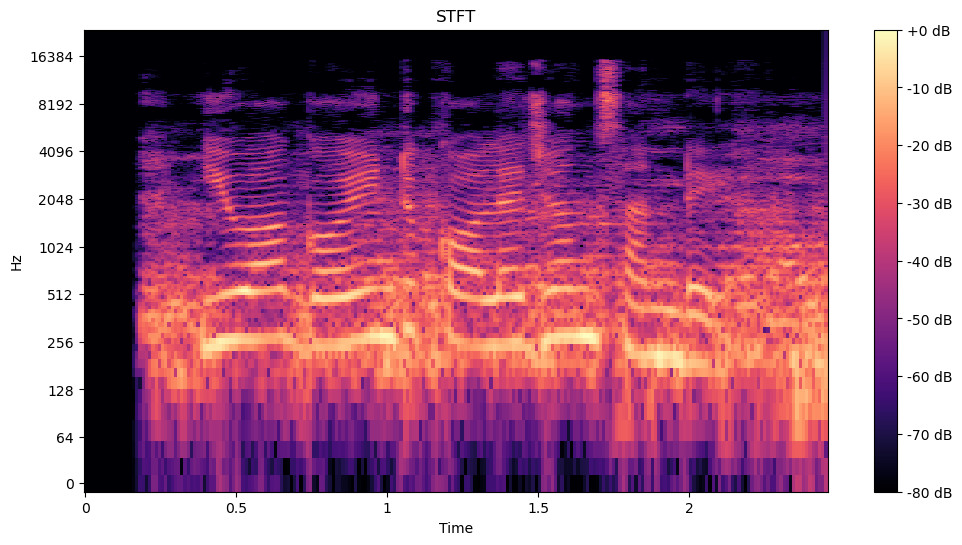

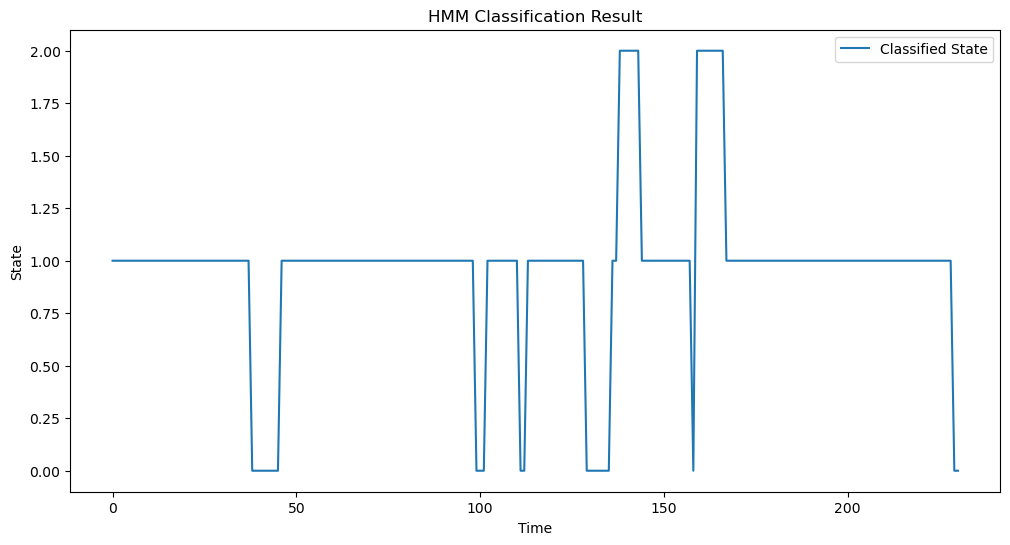

HMM Model Parameters:
Transition Matrix:
[[0.77272727 0.18181818 0.04545455]
 [0.03092784 0.96391753 0.00515464]
 [0.         0.14285714 0.85714286]]
Means:
[[2.40041467e-01 3.08546029e-01 4.34354510e-01 ... 3.32004069e-03
  3.30741696e-03 3.28087609e-03]
 [1.51262803e-01 1.78117992e-01 4.51570935e-01 ... 1.29396903e-04
  1.34448176e-04 1.31195278e-04]
 [1.01389304e-01 1.58183666e-01 4.53223579e-01 ... 1.47409023e-04
  1.41576458e-04 1.37165457e-04]]
Covariances:
[[[8.24681908e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 9.18770923e-02 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.68246450e-01 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.52125417e-04
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   5.52370134e-04 0.00000000e+00]
  [0.00000000e+00 0.0

In [3]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

def load_audio(file_path):
    ydata, sr = librosa.load(file_path, sr=None)
    return ydata, sr

def stft_features(ydata, sr):
    stft = np.abs(librosa.stft(ydata))
    return stft

def train_hmm(features, n_components=3, n_iter=100):
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=n_iter)
    model.fit(features)
    return model

def plot_stft(stft, sr):
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT')
    plt.show()

def classify_signal(model, features):
    # Predict using the trained HMM model
    labels = model.predict(features.T)  # Transpose features to fit HMM's requirement
    return labels

def main():
    audio_file_path = r"sentence.wav"
    
    y, sr = load_audio(audio_file_path)
    
    # Extract STFT features
    stft = stft_features(y, sr)
    
    # Plot STFT
    plot_stft(stft, sr)
    
    # Train HMM
    model = train_hmm(stft.T)  # Transpose stft to fit HMM's requirement
    
    # Classify signal using trained HMM
    labels = classify_signal(model, stft)
    
    # Plot the classification result
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(labels)), labels, label='Classified State')
    plt.xlabel('Time')
    plt.ylabel('State')
    plt.title('HMM Classification Result')
    plt.legend()
    plt.show()

    # Print trained model parameters
    print("HMM Model Parameters:")
    print("Transition Matrix:")
    print(model.transmat_)
    print("Means:")
    print(model.means_)
    print("Covariances:")
    print(model.covars_)
    
if __name__ == "__main__":
    main()
